In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
dataset = pd.read_csv('Base_final.csv')
dataset = dataset.sort_values(['class'])
dataset = dataset.reset_index(drop=True)

In [114]:
X = dataset.drop('class',axis=1)

In [115]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_train_minmax).transform(X_train_minmax)

In [117]:
y = dataset['class']

explained variance ratio (first two components): [0.70372017 0.1748782 ]


Text(0.5, 1.0, 'PCA')

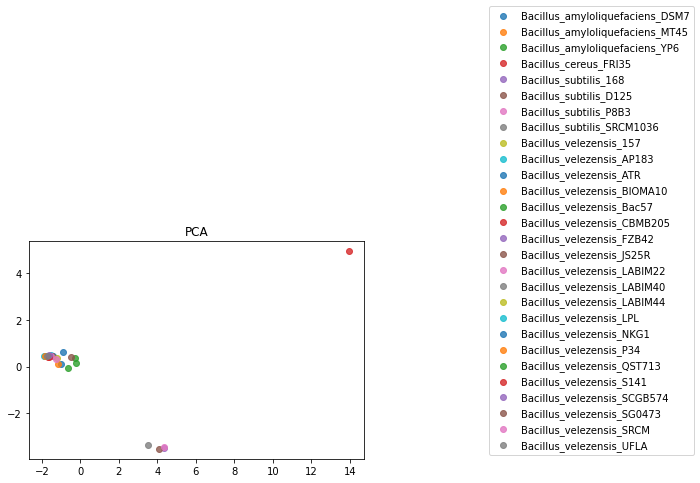

In [118]:
target_names = dataset['class']
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()

for i, target_name in zip( dataset['class'], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, marker='o',
                label=target_name)
plt.legend(loc='right', shadow=False, scatterpoints=1, bbox_to_anchor=(2, 1.05))
plt.title('PCA')

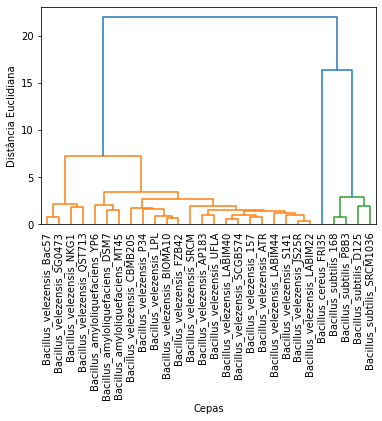

In [119]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train_minmax, method  = "ward"), labels = list(dataset['class']))
plt.xticks(rotation=90)
plt.xlabel('Cepas')
plt.ylabel('Distância Euclidiana')
plt.savefig('Dendograma.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [120]:
from scipy.spatial import distance
dist = pd.DataFrame()
i = 0;
j = 0;
clusters = len(X)
while i < clusters:
    linha = []
    a = tuple(X_train_minmax[i])
    while j< clusters:
        b = tuple(X_train_minmax[j])
        dst = distance.euclidean(a, b)
        linha.append(dst)
        j = j+1
    coluna = []
    coluna.append(linha)
    aux = pd.DataFrame(coluna)
    dist= pd.concat([dist,aux])
    i = i+1
    j = 0

In [121]:
dist = dist.reset_index(drop=True)

In [122]:
val_max = max(dist.max())
val_min = min(dist.min())

In [123]:
mapping = {}
for i, row in dataset.iterrows():
        mapping[i] = row['class']

In [124]:
dist = dist.rename(columns=mapping)

In [125]:
dist[' '] = dataset['class']

In [126]:
dist.set_index(' ',inplace = True)

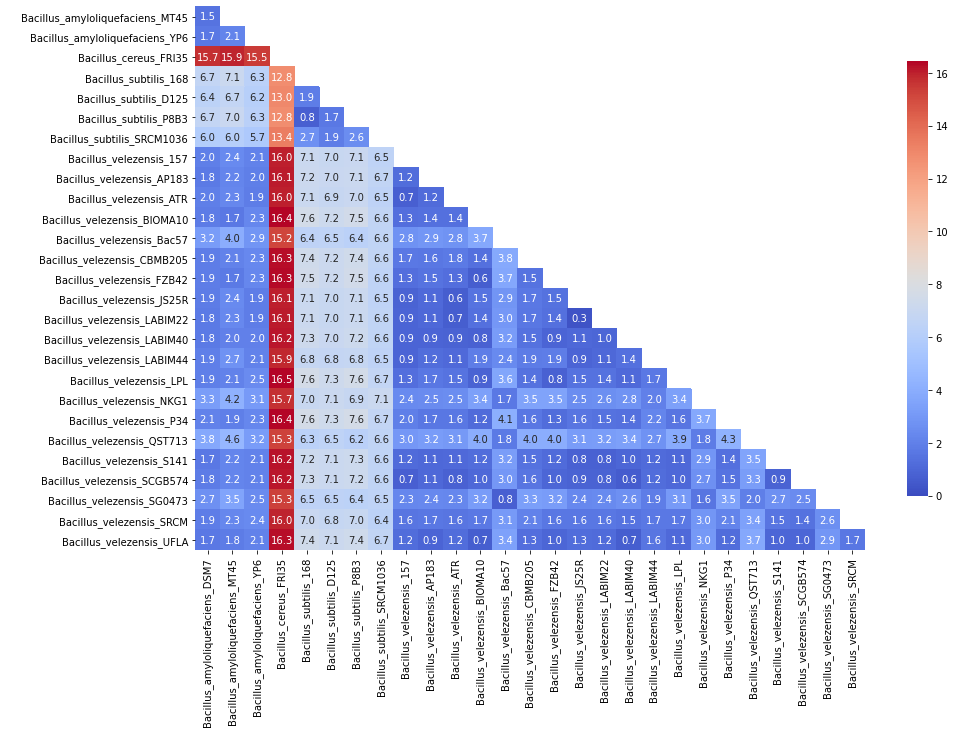

In [127]:
import seaborn as sb 
fig, ax = plt.subplots(figsize=(15, 10))
# mask
mask = np.triu(np.ones_like(dist, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = dist.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm',
           vmin=val_min, vmax=val_max, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.savefig('heatmap.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [128]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [129]:
af = AffinityPropagation(preference=-50,random_state = 0).fit(X_train_minmax)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


In [130]:
dataset['cluster'] = af.fit_predict(X_train_minmax)

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X_train_minmax).transform(X_train_minmax)
y = dataset['cluster']

explained variance ratio (first two components): [0.70372017 0.1748782 ]


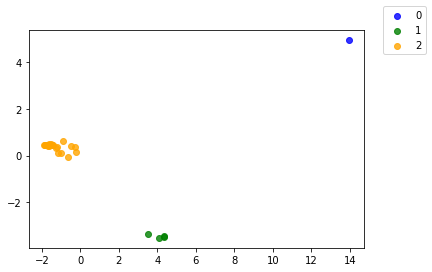

In [132]:
target_names = list(set(dataset['cluster']))
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
colors = ["blue", "green", "orange"]
plt.figure()
for  color,i, target_name in zip(colors,target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8,color = color, marker='o',
                label=target_name)
plt.legend(loc='right', shadow=False, scatterpoints=1, bbox_to_anchor=(1.2, 1))
plt.savefig('pca.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [22]:
dataset

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,class,cluster
0,0.270912,0.229546,0.231277,0.268265,0.094138,0.046579,0.053443,0.076752,0.061970,0.050522,...,274.564583,110.191169,2.491711,79.487179,5.555556,10.263385,42.566500,0.241114,Bacillus_amyloliquefaciens_DSM7,2
1,0.270715,0.229266,0.231587,0.268431,0.094165,0.046257,0.053459,0.076834,0.062097,0.050457,...,291.789599,111.231605,2.623262,79.487179,5.555556,10.259513,42.575348,0.240973,Bacillus_amyloliquefaciens_MT45,2
2,0.270204,0.229909,0.229269,0.270617,0.093752,0.046352,0.053015,0.077085,0.062323,0.050742,...,286.157868,109.691578,2.608750,77.777778,5.555556,10.302470,42.443212,0.242735,Bacillus_amyloliquefaciens_YP6,2
3,0.322661,0.177613,0.178394,0.321331,0.118690,0.051368,0.053409,0.099194,0.059868,0.031950,...,204.619088,81.822140,2.500779,70.833333,3.333333,8.871771,33.220156,0.267060,Bacillus_cereus_FRI35,0
4,0.281827,0.218067,0.217077,0.283029,0.098511,0.046031,0.055850,0.081435,0.066642,0.045982,...,263.184649,101.584566,2.590794,73.333333,4.761905,9.745695,40.421658,0.241101,Bacillus_subtilis_168,1
5,0.282050,0.217718,0.218573,0.281659,0.098309,0.046256,0.056271,0.081213,0.066678,0.045732,...,217.688220,101.786642,2.138672,74.358974,4.761905,9.755154,40.473798,0.241024,Bacillus_subtilis_D125,1
6,0.281828,0.218070,0.217079,0.283023,0.098513,0.046031,0.055851,0.081434,0.066642,0.045985,...,263.275210,101.607336,2.591104,73.333333,4.761905,9.745167,40.419181,0.241103,Bacillus_subtilis_P8B3,1
7,0.280645,0.219184,0.218158,0.282013,0.098068,0.046100,0.055649,0.080829,0.066163,0.046339,...,223.288257,101.103949,2.208502,73.333333,6.666667,9.741406,40.587806,0.240008,Bacillus_subtilis_SRCM1036,1
8,0.267710,0.232241,0.231863,0.268186,0.092530,0.046145,0.052480,0.076554,0.061968,0.051656,...,283.049370,110.139756,2.569911,81.481481,5.555556,10.386104,42.858889,0.242333,Bacillus_velezensis_157,2
9,0.267538,0.231917,0.232688,0.267856,0.092383,0.046041,0.052727,0.076388,0.061810,0.051564,...,305.292482,110.907852,2.752668,79.487179,4.761905,10.311220,42.929966,0.240187,Bacillus_velezensis_AP183,2


In [23]:
y = dataset['cluster']

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=6,random_state =0),n_estimators = 245, learning_rate = 0.2225110509346806, algorithm = 'SAMME', random_state = 0)

In [26]:
clf.fit(X_train_minmax,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=0),
                   learning_rate=0.2225110509346806, n_estimators=245,
                   random_state=0)

In [27]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = clf.feature_importances_

In [28]:
feature_importances.sort_values(['importance'],ascending=False)

,feature,importance
156,T_GA,0.811765
48,CTA,0.188235
0,A,0.000000
221,TG_C,0.000000
228,O0,0.000000
...,...,...
111,A_GT,0.000000
110,A_GG,0.000000
109,A_GC,0.000000
108,A_GA,0.000000


In [32]:
dataset2 = dataset.drop(dataset[dataset.cluster !=  2].index)

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()
X = dataset2.drop(['class','cluster'],axis=1)
X_train_minmax = min_max_scaler.fit_transform(X)

In [38]:
X_train_minmax

array([[0.94216162, 0.2073687 , 0.52992424, ..., 0.01821498, 0.33927632,
        0.17548674],
       [0.89835467, 0.13799554, 0.60103473, ..., 0.        , 0.3513064 ,
        0.15718205],
       [0.78470253, 0.2972383 , 0.06987174, ..., 0.20209777, 0.17164832,
        0.38589282],
       ...,
       [0.94767337, 0.07685583, 0.3699215 , ..., 0.99402154, 0.07505811,
        0.95426559],
       [0.38875652, 0.46865856, 0.67381786, ..., 0.56985114, 0.54173759,
        0.42264211],
       [0.13984348, 0.90879197, 1.        , ..., 0.32099519, 0.92242044,
        0.05759898]])

In [39]:
af = AffinityPropagation(preference=-50,random_state = 0).fit(X_train_minmax)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


In [40]:
dataset2['cluster2'] = af.fit_predict(X_train_minmax)

In [41]:
dataset2

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,class,cluster,cluster2
0,0.270912,0.229546,0.231277,0.268265,0.094138,0.046579,0.053443,0.076752,0.061970,0.050522,...,110.191169,2.491711,79.487179,5.555556,10.263385,42.566500,0.241114,Bacillus_amyloliquefaciens_DSM7,2,0
1,0.270715,0.229266,0.231587,0.268431,0.094165,0.046257,0.053459,0.076834,0.062097,0.050457,...,111.231605,2.623262,79.487179,5.555556,10.259513,42.575348,0.240973,Bacillus_amyloliquefaciens_MT45,2,0
2,0.270204,0.229909,0.229269,0.270617,0.093752,0.046352,0.053015,0.077085,0.062323,0.050742,...,109.691578,2.608750,77.777778,5.555556,10.302470,42.443212,0.242735,Bacillus_amyloliquefaciens_YP6,2,0
8,0.267710,0.232241,0.231863,0.268186,0.092530,0.046145,0.052480,0.076554,0.061968,0.051656,...,110.139756,2.569911,81.481481,5.555556,10.386104,42.858889,0.242333,Bacillus_velezensis_157,2,1
9,0.267538,0.231917,0.232688,0.267856,0.092383,0.046041,0.052727,0.076388,0.061810,0.051564,...,110.907852,2.752668,79.487179,4.761905,10.311220,42.929966,0.240187,Bacillus_velezensis_AP183,2,1
10,0.267912,0.231961,0.231473,0.268654,0.092634,0.046138,0.052375,0.076765,0.061956,0.051516,...,110.341127,2.588321,81.481481,6.666667,10.400761,42.799493,0.243011,Bacillus_velezensis_ATR,2,1
11,0.267119,0.232625,0.233145,0.267110,0.092247,0.046173,0.052578,0.076122,0.061875,0.051736,...,110.962563,2.579413,79.487179,5.555556,10.327820,43.044068,0.239936,Bacillus_velezensis_BIOMA10,2,1
12,0.271172,0.228709,0.230064,0.270055,0.094183,0.046252,0.053174,0.077563,0.061974,0.050378,...,108.577612,2.592816,81.481481,6.666667,10.472065,42.316968,0.247467,Bacillus_velezensis_Bac57,2,2
13,0.267482,0.232646,0.232345,0.267527,0.092417,0.046327,0.052441,0.076295,0.061748,0.051870,...,112.991932,2.540456,80.952381,4.166667,10.388604,42.804097,0.242701,Bacillus_velezensis_CBMB205,2,1
14,0.267264,0.232161,0.232596,0.267980,0.092182,0.046082,0.052574,0.076425,0.061771,0.051643,...,110.040676,2.577870,79.487179,6.666667,10.383516,42.915186,0.241954,Bacillus_velezensis_FZB42,2,1


In [42]:
y = dataset2['cluster2']

In [44]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=6,random_state =0),n_estimators = 245, learning_rate = 0.2225110509346806, algorithm = 'SAMME', random_state = 0)

In [45]:
clf.fit(X_train_minmax,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=0),
                   learning_rate=0.2225110509346806, n_estimators=245,
                   random_state=0)

In [46]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = clf.feature_importances_

In [47]:
feature_importances.sort_values(['importance'],ascending=False)

,feature,importance
57,GCC,6.820276e-01
131,C_TT,3.179724e-01
220,TG_A,1.235571e-16
221,TG_C,0.000000e+00
228,O0,0.000000e+00
...,...,...
111,A_GT,0.000000e+00
110,A_GG,0.000000e+00
109,A_GC,0.000000e+00
108,A_GA,0.000000e+00


In [48]:
dataset3 = dataset.drop(dataset[dataset.cluster ==  2].index)

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X = dataset3.drop(['class','cluster'],axis=1)
X_train_minmax = min_max_scaler.fit_transform(X)

In [50]:
X_train_minmax

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02812962, 0.97312769, 0.96276689, ..., 0.98929183, 0.97744895,
        0.04039035],
       [0.03342804, 0.9647401 , 1.        , ..., 1.        , 0.98452576,
        0.03754855],
       [0.02815657, 0.97319455, 0.96280008, ..., 0.98869457, 0.97711277,
        0.04045398],
       [0.        , 1.        , 0.98966502, ..., 0.98443675, 1.        ,
        0.        ]])

In [51]:
af = AffinityPropagation(preference=-50,random_state = 0).fit(X_train_minmax)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 2


In [52]:
dataset3['cluster3'] = af.fit_predict(X_train_minmax)

In [53]:
dataset3

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,class,cluster,cluster3
3,0.322661,0.177613,0.178394,0.321331,0.118690,0.051368,0.053409,0.099194,0.059868,0.031950,...,81.822140,2.500779,70.833333,3.333333,8.871771,33.220156,0.267060,Bacillus_cereus_FRI35,0,0
4,0.281827,0.218067,0.217077,0.283029,0.098511,0.046031,0.055850,0.081435,0.066642,0.045982,...,101.584566,2.590794,73.333333,4.761905,9.745695,40.421658,0.241101,Bacillus_subtilis_168,1,1
5,0.282050,0.217718,0.218573,0.281659,0.098309,0.046256,0.056271,0.081213,0.066678,0.045732,...,101.786642,2.138672,74.358974,4.761905,9.755154,40.473798,0.241024,Bacillus_subtilis_D125,1,1
6,0.281828,0.218070,0.217079,0.283023,0.098513,0.046031,0.055851,0.081434,0.066642,0.045985,...,101.607336,2.591104,73.333333,4.761905,9.745167,40.419181,0.241103,Bacillus_subtilis_P8B3,1,1
7,0.280645,0.219184,0.218158,0.282013,0.098068,0.046100,0.055649,0.080829,0.066163,0.046339,...,101.103949,2.208502,73.333333,6.666667,9.741406,40.587806,0.240008,Bacillus_subtilis_SRCM1036,1,1


In [56]:
y = dataset3['cluster3']

In [57]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=6,random_state =0),n_estimators = 245, learning_rate = 0.2225110509346806, algorithm = 'SAMME', random_state = 0)

In [58]:
clf.fit(X_train_minmax,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=0),
                   learning_rate=0.2225110509346806, n_estimators=245,
                   random_state=0)

In [59]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = clf.feature_importances_

In [60]:
feature_importances.sort_values(['importance'],ascending=False)

,feature,importance
156,T_GA,1.0
0,A,0.0
221,TG_C,0.0
228,O0,0.0
227,TT_T,0.0
...,...,...
110,A_GG,0.0
109,A_GC,0.0
108,A_GA,0.0
107,A_CT,0.0


In [61]:
dataset4 = dataset.drop(dataset[dataset.cluster ==  0].index)

In [62]:
min_max_scaler = preprocessing.MinMaxScaler()
X = dataset4.drop(['class','cluster'],axis=1)
X_train_minmax = min_max_scaler.fit_transform(X)

In [63]:
X_train_minmax

array([[0.27550297, 0.78706859, 0.87376713, ..., 0.7143945 , 0.81545715,
        0.17548674],
       [0.26269313, 0.76843227, 0.89286294, ..., 0.70909568, 0.8188172 ,
        0.15718205],
       [0.22945944, 0.81121104, 0.75022587, ..., 0.7678868 , 0.76863795,
        0.38589282],
       ...,
       [0.2771147 , 0.75200779, 0.83080042, ..., 0.99826084, 0.74165991,
        0.95426559],
       [0.11367856, 0.85726115, 0.91240793, ..., 0.87486784, 0.87200542,
        0.42264211],
       [0.04089245, 0.975498  , 1.        , ..., 0.80247457, 0.97833171,
        0.05759898]])

In [64]:
af = AffinityPropagation(preference=-50,random_state = 0).fit(X_train_minmax)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 3


In [66]:
dataset4['cluster4'] = af.fit_predict(X_train_minmax)

In [68]:
dataset4

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,class,cluster,cluster4
0,0.270912,0.229546,0.231277,0.268265,0.094138,0.046579,0.053443,0.076752,0.061970,0.050522,...,110.191169,2.491711,79.487179,5.555556,10.263385,42.566500,0.241114,Bacillus_amyloliquefaciens_DSM7,2,2
1,0.270715,0.229266,0.231587,0.268431,0.094165,0.046257,0.053459,0.076834,0.062097,0.050457,...,111.231605,2.623262,79.487179,5.555556,10.259513,42.575348,0.240973,Bacillus_amyloliquefaciens_MT45,2,2
2,0.270204,0.229909,0.229269,0.270617,0.093752,0.046352,0.053015,0.077085,0.062323,0.050742,...,109.691578,2.608750,77.777778,5.555556,10.302470,42.443212,0.242735,Bacillus_amyloliquefaciens_YP6,2,2
4,0.281827,0.218067,0.217077,0.283029,0.098511,0.046031,0.055850,0.081435,0.066642,0.045982,...,101.584566,2.590794,73.333333,4.761905,9.745695,40.421658,0.241101,Bacillus_subtilis_168,1,0
5,0.282050,0.217718,0.218573,0.281659,0.098309,0.046256,0.056271,0.081213,0.066678,0.045732,...,101.786642,2.138672,74.358974,4.761905,9.755154,40.473798,0.241024,Bacillus_subtilis_D125,1,0
6,0.281828,0.218070,0.217079,0.283023,0.098513,0.046031,0.055851,0.081434,0.066642,0.045985,...,101.607336,2.591104,73.333333,4.761905,9.745167,40.419181,0.241103,Bacillus_subtilis_P8B3,1,0
7,0.280645,0.219184,0.218158,0.282013,0.098068,0.046100,0.055649,0.080829,0.066163,0.046339,...,101.103949,2.208502,73.333333,6.666667,9.741406,40.587806,0.240008,Bacillus_subtilis_SRCM1036,1,0
8,0.267710,0.232241,0.231863,0.268186,0.092530,0.046145,0.052480,0.076554,0.061968,0.051656,...,110.139756,2.569911,81.481481,5.555556,10.386104,42.858889,0.242333,Bacillus_velezensis_157,2,2
9,0.267538,0.231917,0.232688,0.267856,0.092383,0.046041,0.052727,0.076388,0.061810,0.051564,...,110.907852,2.752668,79.487179,4.761905,10.311220,42.929966,0.240187,Bacillus_velezensis_AP183,2,2
10,0.267912,0.231961,0.231473,0.268654,0.092634,0.046138,0.052375,0.076765,0.061956,0.051516,...,110.341127,2.588321,81.481481,6.666667,10.400761,42.799493,0.243011,Bacillus_velezensis_ATR,2,2


In [69]:
y = dataset4['cluster4']

In [70]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=6,random_state =0),n_estimators = 245, learning_rate = 0.2225110509346806, algorithm = 'SAMME', random_state = 0)

In [71]:
clf.fit(X_train_minmax,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=0),
                   learning_rate=0.2225110509346806, n_estimators=245,
                   random_state=0)

In [72]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = clf.feature_importances_

In [73]:
feature_importances.sort_values(['importance'],ascending=False)

,feature,importance
156,T_GA,0.678571
311,k1,0.321429
0,A,0.000000
229,O1,0.000000
227,TT_T,0.000000
...,...,...
110,A_GG,0.000000
109,A_GC,0.000000
108,A_GA,0.000000
107,A_CT,0.000000


In [79]:
dataset5 = dataset.drop(dataset[dataset.cluster ==  1].index)

In [80]:
min_max_scaler = preprocessing.MinMaxScaler()
X = dataset5.drop(['class','cluster'],axis=1)
X_train_minmax = min_max_scaler.fit_transform(X)

In [81]:
X_train_minmax

array([[0.07565378, 0.94195937, 0.96265623, ..., 0.86959869, 0.95057603,
        0.04953432],
       [0.07213617, 0.9368795 , 0.96830539, ..., 0.86717937, 0.95147591,
        0.04436749],
       [0.06301012, 0.9485401 , 0.92610874, ..., 0.89402212, 0.93803698,
        0.10892525],
       ...,
       [0.07609636, 0.93240253, 0.94994529, ..., 0.99920594, 0.93081177,
        0.26935878],
       [0.03121641, 0.96109239, 0.97408743, ..., 0.94286736, 0.96572069,
        0.11929841],
       [0.01122916, 0.99332127, 1.        , ..., 0.90981415, 0.99419683,
        0.01625836]])

In [82]:
af = AffinityPropagation(preference=-50,random_state = 0).fit(X_train_minmax)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 2


In [83]:
dataset5['cluster5'] = af.fit_predict(X_train_minmax)

In [84]:
dataset5

,A,C,G,T,AA,AC,AG,AT,CA,CC,...,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,class,cluster,cluster5
0,0.270912,0.229546,0.231277,0.268265,0.094138,0.046579,0.053443,0.076752,0.061970,0.050522,...,110.191169,2.491711,79.487179,5.555556,10.263385,42.566500,0.241114,Bacillus_amyloliquefaciens_DSM7,2,1
1,0.270715,0.229266,0.231587,0.268431,0.094165,0.046257,0.053459,0.076834,0.062097,0.050457,...,111.231605,2.623262,79.487179,5.555556,10.259513,42.575348,0.240973,Bacillus_amyloliquefaciens_MT45,2,1
2,0.270204,0.229909,0.229269,0.270617,0.093752,0.046352,0.053015,0.077085,0.062323,0.050742,...,109.691578,2.608750,77.777778,5.555556,10.302470,42.443212,0.242735,Bacillus_amyloliquefaciens_YP6,2,1
3,0.322661,0.177613,0.178394,0.321331,0.118690,0.051368,0.053409,0.099194,0.059868,0.031950,...,81.822140,2.500779,70.833333,3.333333,8.871771,33.220156,0.267060,Bacillus_cereus_FRI35,0,0
8,0.267710,0.232241,0.231863,0.268186,0.092530,0.046145,0.052480,0.076554,0.061968,0.051656,...,110.139756,2.569911,81.481481,5.555556,10.386104,42.858889,0.242333,Bacillus_velezensis_157,2,1
9,0.267538,0.231917,0.232688,0.267856,0.092383,0.046041,0.052727,0.076388,0.061810,0.051564,...,110.907852,2.752668,79.487179,4.761905,10.311220,42.929966,0.240187,Bacillus_velezensis_AP183,2,1
10,0.267912,0.231961,0.231473,0.268654,0.092634,0.046138,0.052375,0.076765,0.061956,0.051516,...,110.341127,2.588321,81.481481,6.666667,10.400761,42.799493,0.243011,Bacillus_velezensis_ATR,2,1
11,0.267119,0.232625,0.233145,0.267110,0.092247,0.046173,0.052578,0.076122,0.061875,0.051736,...,110.962563,2.579413,79.487179,5.555556,10.327820,43.044068,0.239936,Bacillus_velezensis_BIOMA10,2,1
12,0.271172,0.228709,0.230064,0.270055,0.094183,0.046252,0.053174,0.077563,0.061974,0.050378,...,108.577612,2.592816,81.481481,6.666667,10.472065,42.316968,0.247467,Bacillus_velezensis_Bac57,2,1
13,0.267482,0.232646,0.232345,0.267527,0.092417,0.046327,0.052441,0.076295,0.061748,0.051870,...,112.991932,2.540456,80.952381,4.166667,10.388604,42.804097,0.242701,Bacillus_velezensis_CBMB205,2,1


In [86]:
y = dataset5['cluster5']

In [87]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=6,random_state =0),n_estimators = 245, learning_rate = 0.2225110509346806, algorithm = 'SAMME', random_state = 0)

In [88]:
clf.fit(X_train_minmax,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=0),
                   learning_rate=0.2225110509346806, n_estimators=245,
                   random_state=0)

In [89]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = clf.feature_importances_

In [90]:
feature_importances.sort_values(['importance'],ascending=False)

,feature,importance
156,T_GA,1.0
0,A,0.0
221,TG_C,0.0
228,O0,0.0
227,TT_T,0.0
...,...,...
110,A_GG,0.0
109,A_GC,0.0
108,A_GA,0.0
107,A_CT,0.0
